In [5]:
import pandas as pd

In [2]:
import os

In [6]:
HOUSING_PATH="D:\Programming\ML\handson-ml2\datasets\housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
df = load_housing_data()

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


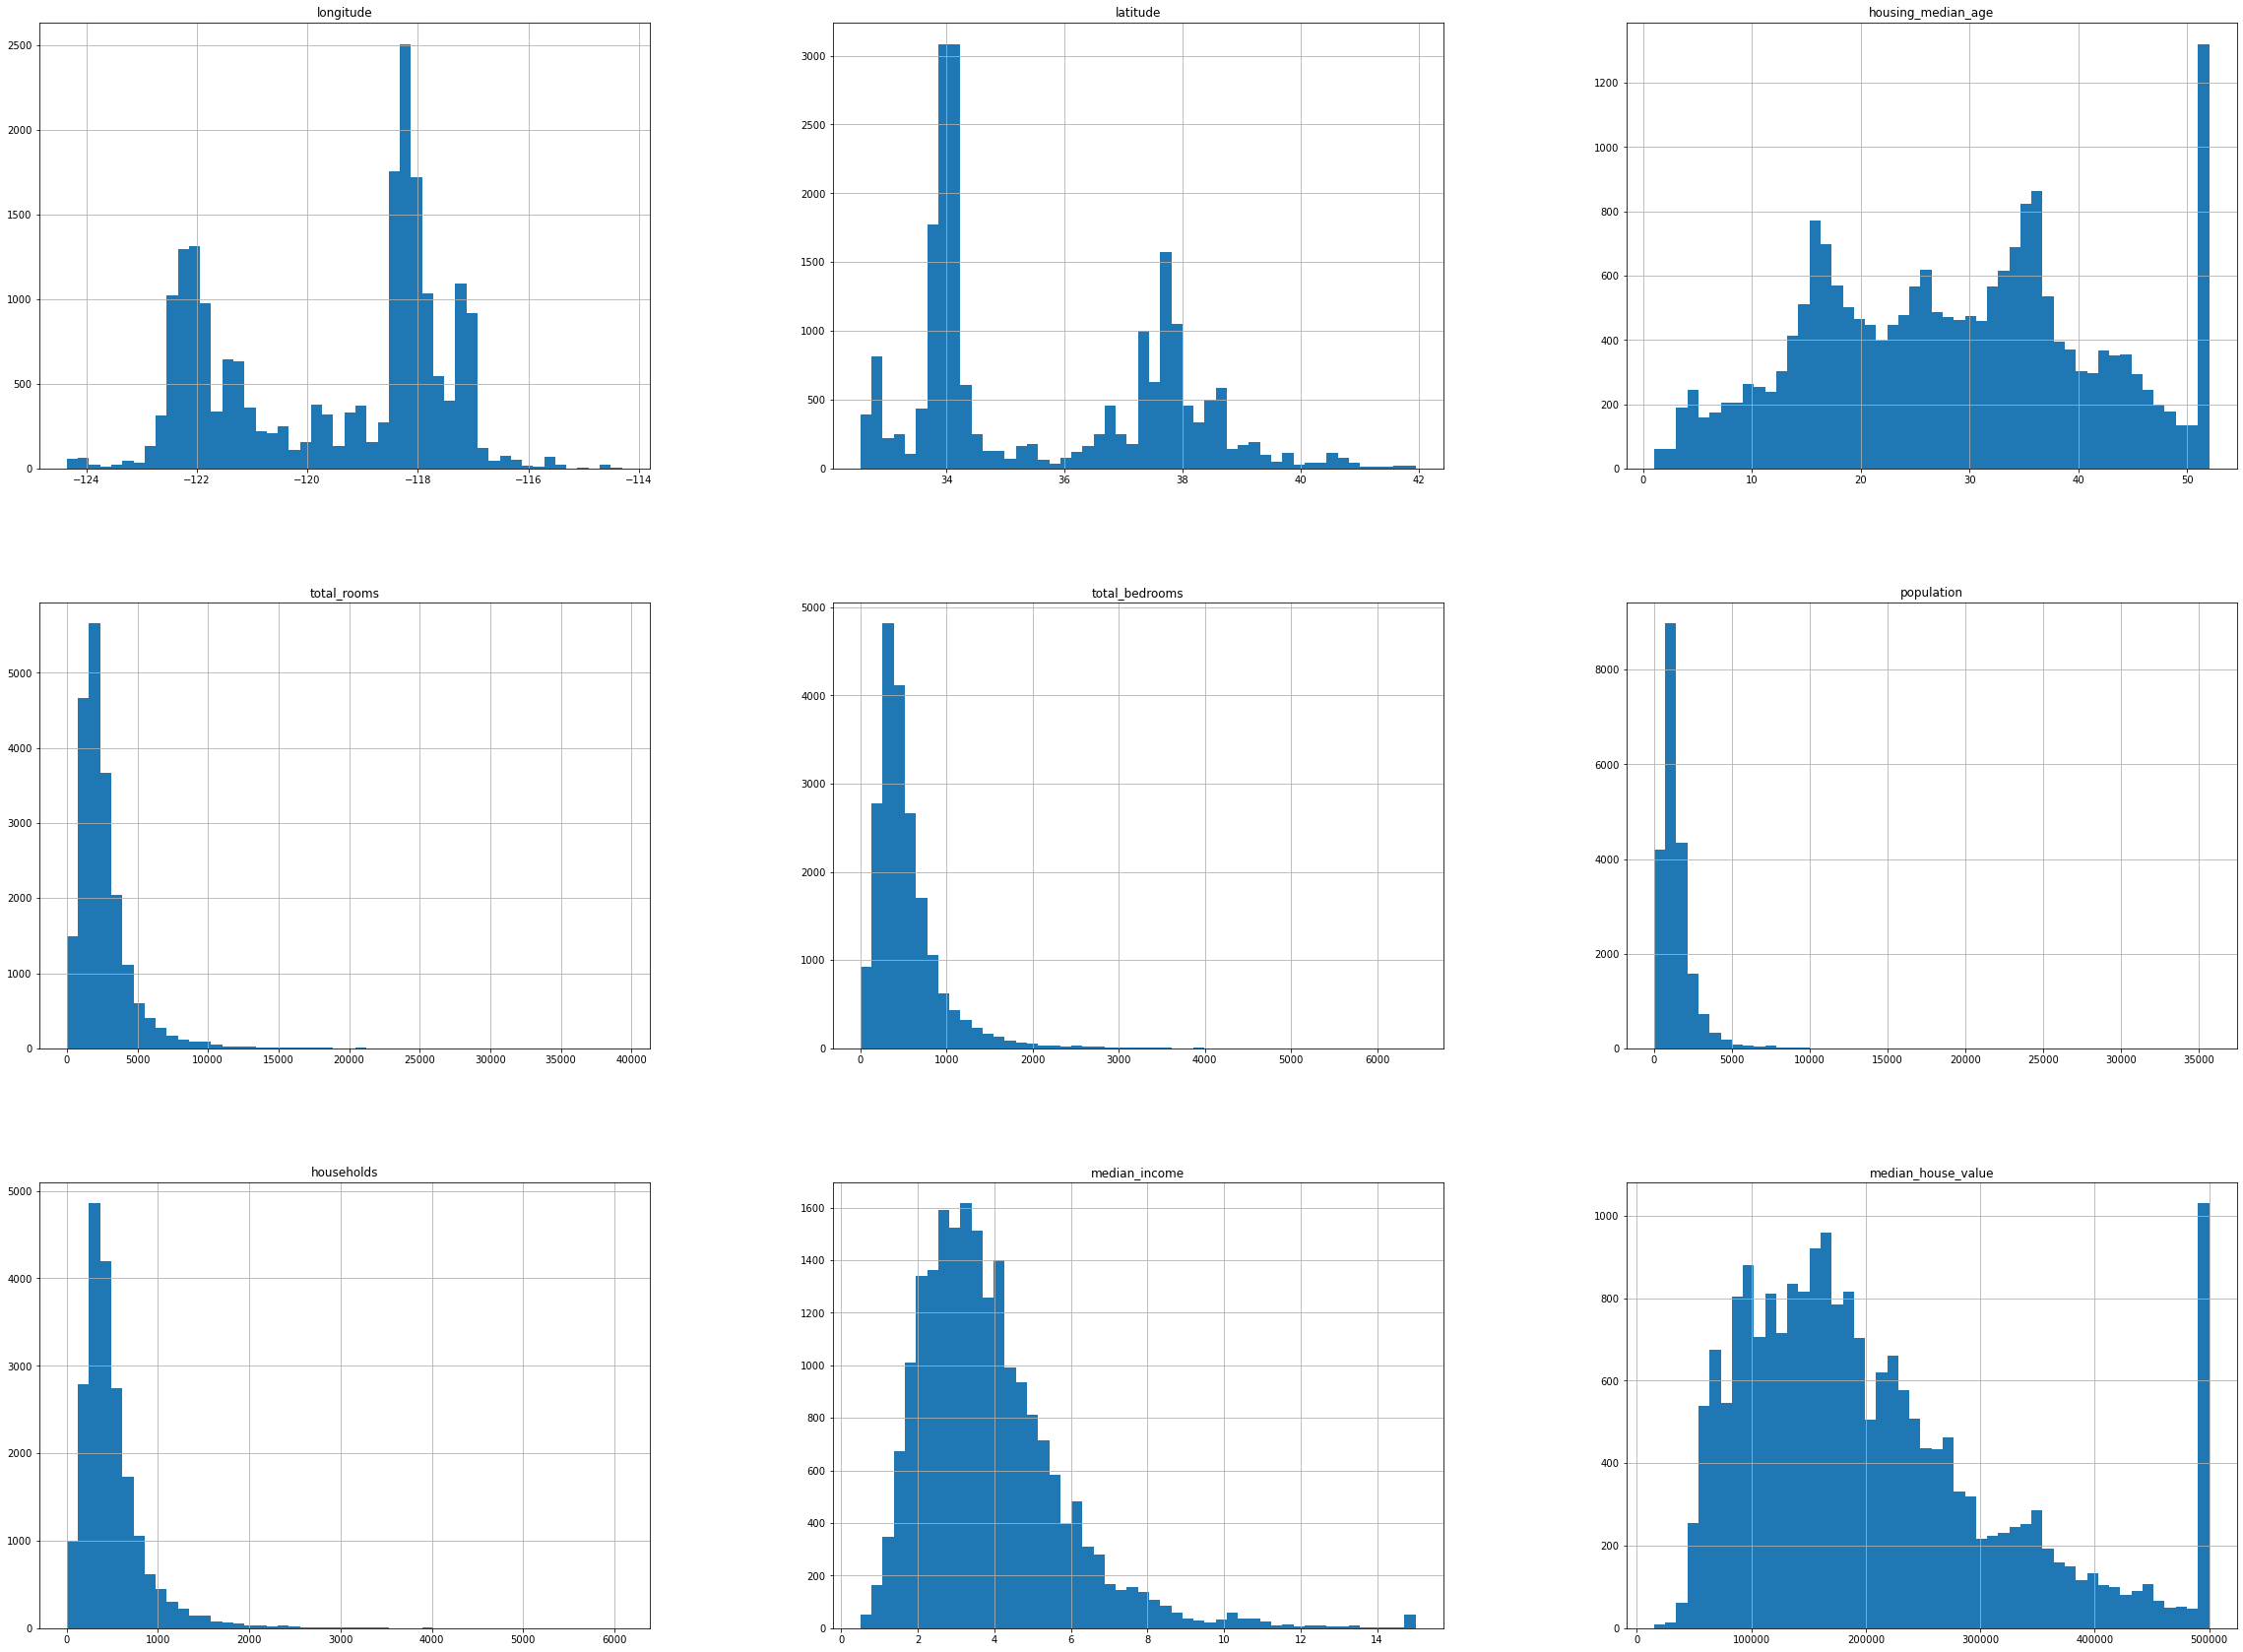

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(40,30))
plt.show()

- Working with preprocessed attributes is common in Machine Learning,and it is not necessarily a problem, but you should try to understand how the data was computed

### Create a test set

Setting aside data just after taking a look => We might see a pattern in data => We are overfitting => We might select a model to fit the tets set

In [17]:
import numpy as np
np.random.permutation(10)

    

array([0, 2, 4, 5, 3, 8, 6, 1, 7, 9])

In [18]:
def split_train_test(data, test_ratio):
    ran_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = ran_indices[:test_set_size]
    train_indices = ran_indices[test_set_size:]
    return data.loc[train_indices], data.loc[test_indices]

In [19]:
train_set, test_set = split_train_test(df, 0.2)
print(f"Train : {len(train_set)} Test: {len(test_set)}")

Train : 16512 Test: 4128


If you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.

- One solution is to save the test set on the first run and then load it in subsequent runs. 

- Another option is to set the random number generator’s seed (e.g., np.ran dom.seed(42))14 before calling np.random.permutation(), so that it always generates the same shuffled indices

In [20]:
from zlib import crc32

- crc32 generates uniformly distributed data 

In [77]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [78]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [80]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [ ]:
train_set['']

In [81]:
len(train_set)

16512

In [82]:
len(test_set)

4128

For above to work
- All identifier should be unique and immutable
- New data when it get sadded it should be appended to the exsting data

If this is difficult then we can choose a feature which will be unique and immutable. Longitude + latitude => they have such feature

In [84]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [86]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [87]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

Stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

Ex: Strata can be male and female. Consiously trying to effort for data to be as representative as possible

<AxesSubplot:>

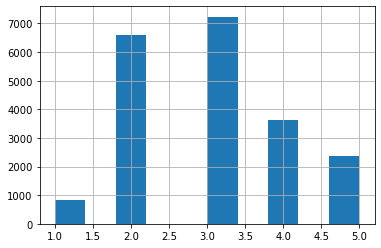

In [88]:
df["income_cat"] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
df["income_cat"].hist()

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [92]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [93]:
 strat_train_set["income_cat"].value_counts() / len(strat_train_set) 

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In summary 
Different ways of splitting the data

- Random indices for train and test set
- Using CRC32 if data is expected to expand, data should be appended, have a unique and immutable id
- If we know any feature is very inportant. Trying to maintain the distribution across train and test set. 
##### Stratifying #####
